In [1]:
import pandas as pd

products = pd.read_csv('./dataset/product_concat_v3.csv')
members = pd.read_csv('./dataset/members_concat_v2.csv')

In [14]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751315 entries, 0 to 751314
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   MEMBER_ID     751315 non-null  object
 1   CATALOG_NM    751315 non-null  object
 2   CATEGORYM_ID  751315 non-null  int64 
 3   KEYWORD       751315 non-null  object
 4   DISPLAY       751315 non-null  int64 
 5   CATALOG_DESC  751259 non-null  object
 6   INPUT_DT      751315 non-null  int64 
 7   UPDATE_DT     751315 non-null  int64 
 8   REMOTEIP      751315 non-null  int64 
 9   SHOW_CHK      751315 non-null  int64 
 10  judge         751315 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 63.1+ MB


In [15]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466762 entries, 0 to 466761
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   MEMBER_ID   466762 non-null  object
 1   GUBUN       466762 non-null  int64 
 2   COUNTRY_CD  466633 non-null  object
 3   KEYWORD     191511 non-null  object
 4   LOGIN_DT    466762 non-null  int64 
 5   LOGIN_CNT   466762 non-null  int64 
 6   INPUT_DT    466762 non-null  int64 
 7   UPDATE_DT   466762 non-null  int64 
 8   REMOTEIP    466762 non-null  int64 
 9   SHOW_CHK    466762 non-null  int64 
 10  MTYPE       466762 non-null  int64 
 11  ORDER_FLG   466762 non-null  int64 
 12  judge       466762 non-null  int64 
 13  BLACK_LIST  466762 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 49.9+ MB


In [16]:
print('회원:', members['SHOW_CHK'].value_counts())
print('상품:', products['SHOW_CHK'].value_counts())

회원: SHOW_CHK
1    373341
0     93421
Name: count, dtype: int64
상품: SHOW_CHK
3    538722
0    161898
1     28118
2     22577
Name: count, dtype: int64


In [17]:
members[members['COUNTRY_CD'].isna()]

,MEMBER_ID,GUBUN,COUNTRY_CD,KEYWORD,LOGIN_DT,LOGIN_CNT,INPUT_DT,UPDATE_DT,REMOTEIP,SHOW_CHK,MTYPE,ORDER_FLG,judge,BLACK_LIST
1493,atlanticnammining,0,NaN,rough dimonds,20190127,2,20190127,20190127,197233106147,0,0,90,0,0
1746,nahme097,0,NaN,"undetected money,real money,original original ...",20180804,2,20180804,20180804,5626343,0,0,90,0,0
10017,79010500055,0,NaN,rough Diamonds,20200226,2,20200226,20200226,19718875176,0,0,90,0,0
72478,copperapn,0,NaN,"copper,ore,namibia,africa",20220207,1,20220207,20220207,4118279133,0,0,90,0,0
81775,bvcxx,0,NaN,cream,20221018,1,20221018,20221018,1546807,0,0,90,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447397,na04851044,1,NaN,NaN,20230221,1,20230221,20230221,19718822221,1,1,90,1,0
452989,na04846692,1,NaN,NaN,20230217,1,20230217,20230217,4118296247,1,1,90,1,0
459448,na04779574,1,NaN,NaN,20221031,1,20221031,20221031,19718821072,1,1,90,1,0
462576,afriskins,0,NaN,"fashion fur coats,fashion fur jackets,fashion ...",20220606,11,20220525,20220525,105232255133,1,0,90,1,0


In [ ]:
# pip install ipwhois

In [6]:
import ipwhois
from ipwhois import IPWhois

# 새로운 열 'COUNTRY_CD'가 NaN인 행을 찾기
missing_country_rows = members[members['COUNTRY_CD'].isna()]

def get_country_code(ip):
    try:
        obj = IPWhois(ip)
        results = obj.lookup_rdap()
        return results['asn_country_code']
    except Exception as e:
        print(f"Error for IP {ip}: {e}")
        return None

# 'COUNTRY_CD'가 NaN인 행에 대해 함수를 적용하여 국가 코드 얻기
missing_country_rows['COUNTRY_CD'] = missing_country_rows['REMOTEIP'].apply(get_country_code)

# 기존 데이터프레임에 업데이트
members.update(missing_country_rows)

# 업데이트된 데이터프레임 출력
print(members)

Error for IP 197233106147: IPv6 address ::2d:ec02:5ce3 is already defined as Reserved via RFC 4291.
Error for IP 5626343: IPv4 address 0.85.217.231 is already defined as This Network via RFC 1122, Section 3.2.1.3.
Error for IP 19718875176: IPv6 address ::4:9756:2828 is already defined as Reserved via RFC 4291.
Error for IP 4118279133: IPv4 address 245.119.243.221 is already defined as Private-Use Networks via RFC 1918.
Error for IP 1546807: IPv4 address 0.23.154.55 is already defined as This Network via RFC 1122, Section 3.2.1.3.
Error for IP 10523225519: IPv6 address ::2:733b:adaf is already defined as Reserved via RFC 4291.
Error for IP 19723363250: IPv6 address ::4:979a:a3b2 is already defined as Reserved via RFC 4291.
Error for IP 10523225553: IPv6 address ::2:733b:add1 is already defined as Reserved via RFC 4291.
Error for IP 10523225564: IPv6 address ::2:733b:addc is already defined as Reserved via RFC 4291.
Error for IP 4118273218: IPv4 address 245.119.220.194 is already defined

C:\Users\user\AppData\Local\Temp\ipykernel_19160\595524296.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_country_rows['COUNTRY_CD'] = missing_country_rows['REMOTEIP'].apply(get_country_code)


In [12]:
# 새로운 열 'COUNTRY_CD'가 NaN인 행을 찾기
missing_country_rows = members[members['COUNTRY_CD'].isna()]

def get_country_code(ip):
    try:
        obj = IPWhois(ip)
        results = obj.lookup_rdap()
        country_code = results['asn_country_code']
        
        # 국가 코드가 0인 경우 대체 값으로 변경
        if country_code == '0':
            return 'etc'  # 여기에 원하는 대체 값 지정
        else:
            return country_code
    except Exception as e:
        print(f"Error for IP {ip}: {e}")
        return None

# 'COUNTRY_CD'가 NaN이거나 0인 행에 대해 함수를 적용하여 국가 코드 얻기
missing_country_rows['COUNTRY_CD'] = missing_country_rows['REMOTEIP'].apply(get_country_code)

# 기존 데이터프레임에 업데이트
members.update(missing_country_rows)

# 업데이트된 데이터프레임 출력
print(members)

Error for IP 197233106147: IPv6 address ::2d:ec02:5ce3 is already defined as Reserved via RFC 4291.
Error for IP 5626343: IPv4 address 0.85.217.231 is already defined as This Network via RFC 1122, Section 3.2.1.3.
Error for IP 19718875176: IPv6 address ::4:9756:2828 is already defined as Reserved via RFC 4291.
Error for IP 4118279133: IPv4 address 245.119.243.221 is already defined as Private-Use Networks via RFC 1918.
Error for IP 1546807: IPv4 address 0.23.154.55 is already defined as This Network via RFC 1122, Section 3.2.1.3.
Error for IP 10523225519: IPv6 address ::2:733b:adaf is already defined as Reserved via RFC 4291.
Error for IP 19723363250: IPv6 address ::4:979a:a3b2 is already defined as Reserved via RFC 4291.
Error for IP 10523225553: IPv6 address ::2:733b:add1 is already defined as Reserved via RFC 4291.
Error for IP 10523225564: IPv6 address ::2:733b:addc is already defined as Reserved via RFC 4291.
Error for IP 4118273218: IPv4 address 245.119.220.194 is already defined

C:\Users\user\AppData\Local\Temp\ipykernel_19160\3964224607.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_country_rows['COUNTRY_CD'] = missing_country_rows['REMOTEIP'].apply(get_country_code)


In [13]:
members[members['COUNTRY_CD'].isna()]

,MEMBER_ID,GUBUN,COUNTRY_CD,KEYWORD,LOGIN_DT,LOGIN_CNT,INPUT_DT,UPDATE_DT,REMOTEIP,SHOW_CHK,MTYPE,ORDER_FLG,judge,BLACK_LIST
1493,atlanticnammining,0,NaN,rough dimonds,20190127,2,20190127,20190127,197233106147,0,0,90,0,0
1746,nahme097,0,NaN,"undetected money,real money,original original ...",20180804,2,20180804,20180804,5626343,0,0,90,0,0
10017,79010500055,0,NaN,rough Diamonds,20200226,2,20200226,20200226,19718875176,0,0,90,0,0
72478,copperapn,0,NaN,"copper,ore,namibia,africa",20220207,1,20220207,20220207,4118279133,0,0,90,0,0
81775,bvcxx,0,NaN,cream,20221018,1,20221018,20221018,1546807,0,0,90,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447397,na04851044,1,NaN,NaN,20230221,1,20230221,20230221,19718822221,1,1,90,1,0
452989,na04846692,1,NaN,NaN,20230217,1,20230217,20230217,4118296247,1,1,90,1,0
459448,na04779574,1,NaN,NaN,20221031,1,20221031,20221031,19718821072,1,1,90,1,0
462576,afriskins,0,NaN,"fashion fur coats,fashion fur jackets,fashion ...",20220606,11,20220525,20220525,105232255133,1,0,90,1,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cnt_vect = CountVectorizer()
country_vect = cnt_vect.fit_transform(members['COUNTRY_CD'])

- 널값이 존재해서 카운트 벡터 실패

In [ ]:
import numpy as np

county_cd_labeling ={country : num for num, country in enumerate(members['COUNTRY_CD'].unique())}

print('코드명 :',county_cd_labeling.keys())
print('대체값 :',county_cd_labeling.values())

# 딕셔너리 값으로 국가 코드 변경
members['COUNTRY_CD'] = [county_cd_labeling[country] for country in members['COUNTRY_CD'].values]

# 회원 Kmeans()

In [53]:
x = members[['COUNTRY_CD','SHOW_CHK','GUBUN']]

# 엘보우 펑션 없이

In [20]:
from sklearn.cluster import KMeans

km_cluster = KMeans(n_clusters=2, random_state= 0)
km_cluster.fit(x)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

members['cluster_label'] = cluster_label

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
members['cluster_label'].value_counts()

cluster_label
1    396745
0     70017
Name: count, dtype: int64

In [21]:
cluster_centers = km_cluster.cluster_centers_
print('클러스터 형태: ', cluster_centers.shape)
print(cluster_centers)

클러스터 형태:  (2, 3)
[[91.75838725  0.96826485  0.71436937]
 [ 9.96289556  0.77013195  0.46323709]]


In [25]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466762 entries, 0 to 466761
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   MEMBER_ID      466762 non-null  object
 1   GUBUN          466762 non-null  int64 
 2   COUNTRY_CD     466762 non-null  int64 
 3   KEYWORD        191511 non-null  object
 4   LOGIN_DT       466762 non-null  int64 
 5   LOGIN_CNT      466762 non-null  int64 
 6   INPUT_DT       466762 non-null  int64 
 7   UPDATE_DT      466762 non-null  int64 
 8   REMOTEIP       466762 non-null  int64 
 9   SHOW_CHK       466762 non-null  int64 
 10  MTYPE          466762 non-null  int64 
 11  ORDER_FLG      466762 non-null  int64 
 12  judge          466762 non-null  int64 
 13  BLACK_LIST     466762 non-null  int64 
 14  cluster_label  466762 non-null  int32 
dtypes: int32(1), int64(12), object(2)
memory usage: 51.6+ MB


In [31]:
print('SHOW_CHK:', members[members['cluster_label']==0]['SHOW_CHK'].value_counts())
print('judge:', members[members['cluster_label']==0]['judge'].value_counts())

SHOW_CHK: SHOW_CHK
1    67795
0     2222
Name: count, dtype: int64
judge: judge
1    67795
0     2222
Name: count, dtype: int64


In [38]:
print('정상회원 비율:', round(67795 / (67795 +2222),2))
print('이상회원 비율:', round(2222 / (67795 +2222),2))

정상회원 비율: 0.97
이상회원 비율: 0.03


In [39]:
print('SHOW_CHK:', members[members['cluster_label']==1]['SHOW_CHK'].value_counts())
print('judge:', members[members['cluster_label']==1]['judge'].value_counts())

SHOW_CHK: SHOW_CHK
1    305546
0     91199
Name: count, dtype: int64
judge: judge
1    305546
0     91199
Name: count, dtype: int64


In [40]:
print('정상회원 비율:', round(305546 / (305546 +91199),2))
print('이상회원 비율:', round(91199 / (305546 +91199),2))

정상회원 비율: 0.77
이상회원 비율: 0.23


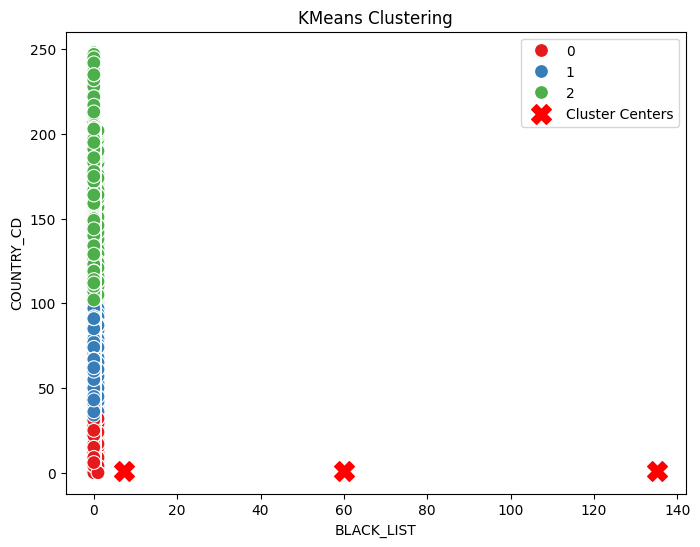

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# 산점도 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BLACK_LIST', y= 'COUNTRY_CD', hue='cluster_label', data=members, palette='Set1', s=100)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

# 엘보우 펑션 그려보기

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\

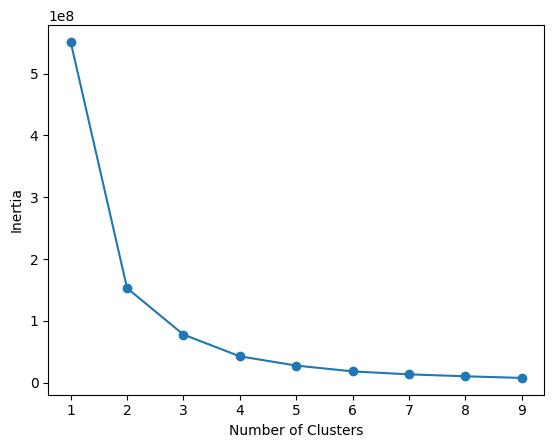

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
k_range = range(1,10)

inertia_arr = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state= 10)
    kmeans.fit(x) # 학습
    inertia_arr.append(kmeans.inertia_)

# Elbow function 그리기
plt.plot(k_range, inertia_arr, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [41]:
km_cluster = KMeans(n_clusters=3, random_state= 0)
km_cluster.fit(x)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

members['cluster_label'] = cluster_label

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [42]:
members['cluster_label'].value_counts()

cluster_label
0    364755
1     80434
2     21573
Name: count, dtype: int64

In [43]:
cluster_centers = km_cluster.cluster_centers_
print('클러스터 형태: ', cluster_centers.shape)
print(cluster_centers)

클러스터 형태:  (3, 3)
[[  7.20312813   0.7551891    0.44656824]
 [ 60.07270557   0.95545416   0.66164806]
 [135.266815     0.974876     0.82037732]]


In [44]:
print('cluster_label = 0:', members[members['cluster_label']==0]['SHOW_CHK'].value_counts())
print('cluster_label = 1:', members[members['cluster_label']==1]['SHOW_CHK'].value_counts())
print('cluster_label = 2:', members[members['cluster_label']==2]['SHOW_CHK'].value_counts())

cluster_label = 0: SHOW_CHK
1    275459
0     89296
Name: count, dtype: int64
cluster_label = 1: SHOW_CHK
1    76851
0     3583
Name: count, dtype: int64
cluster_label = 2: SHOW_CHK
1    21031
0      542
Name: count, dtype: int64


In [48]:
members[(members['cluster_label']==0) & (members['judge'] ==0) ]['KEYWORD'].value_counts()

KEYWORD
Apple Airpods                                                                                                                                          4602
skin care                                                                                                                                              3010
Earphone & Headphone                                                                                                                                   2545
Ear Headphones                                                                                                                                         2262
accessories                                                                                                                                            1665
                                                                                                                                                       ... 
windows key                                             

In [50]:
members[(members['cluster_label']==1) & (members['judge'] ==0) ]['KEYWORD'].value_counts()

KEYWORD
product                                                    111
Earphone & Headphone                                        67
cream                                                       67
tools                                                       65
Products                                                    62
                                                          ... 
pharmacy,injections,health                                   1
3M Masks,N95 N99 masks,anti virus masks,surgical masks       1
Fonio seeds                                                  1
Health Supplies,Beauty Care Products,Medicinal Supplies      1
Phone,Smartphone,Mobile Phone                                1
Name: count, Length: 1894, dtype: int64

In [51]:
members[(members['cluster_label']==2) & (members['judge'] ==0) ]['KEYWORD'].value_counts()

KEYWORD
cream                                   69
Nintendo Switch,Nintendo Switch Lite    10
tools                                   10
Laptops                                  8
IPL Hair Remover                         8
                                        ..
Mask N95 FFP2 FFP3                       1
Perfumes,Creed Aventus                   1
Medical Beauty Equipment Supplier        1
makita                                   1
Ps5                                      1
Name: count, Length: 321, dtype: int64

# 상품

In [55]:
y = products[['SHOW_CHK','CATEGORYM_ID']]

In [56]:
from sklearn.cluster import KMeans

km_cluster = KMeans(n_clusters=2, random_state= 0)
km_cluster.fit(y)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

products['cluster_label'] = cluster_label

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [58]:
products['cluster_label'].value_counts()

cluster_label
0    724796
1     26519
Name: count, dtype: int64

In [59]:
cluster_centers = km_cluster.cluster_centers_
print('클러스터 형태: ', cluster_centers.shape)
print(cluster_centers)

클러스터 형태:  (2, 2)
[[2.25437778e+00 1.40323583e+05]
 [2.09185867e+00 2.28707902e+07]]


### judge 컬럼 확인

In [63]:
print('cluster_label = 0:\n', products[products['cluster_label']==0]['judge'].value_counts())
print()
print('cluster_label = 1:\n', products[products['cluster_label']==1]['judge'].value_counts())


cluster_label = 0:
 judge
1    520888
0    203908
Name: count, dtype: int64

cluster_label = 1:
 judge
1    17834
0     8685
Name: count, dtype: int64


### 키워드 확인

In [81]:
print(products[(products['cluster_label']==0) & (products['judge'] ==0) ]['KEYWORD'].value_counts())
products[(products['cluster_label']==0) & (products['judge'] ==0) ]['KEYWORD'].values[:30:-1]

KEYWORD
The Ordinary                              3642
mobile phone                              3491
skin care                                 2394
Chemical                                  2203
Apple AirPods                             2147
                                          ... 
Hand Gloves,Gloves,Syringes                  1
Specialized S Works Venge                    1
Bose-Lifestyle 650                           1
HP Spectre X360                              1
aicar,Acadesine,AICA-Riboside,ostarine       1
Name: count, Length: 56348, dtype: int64


array(['copper cathode seller,Copper Ball seller,Copper Pyramid Seller,Copper Nugget Seller',
       'copper cathode seller,Copper Ball seller,Copper Pyramid Seller,Copper Nugget Seller',
       'aicar,Acadesine,AICA-Riboside,ostarine', ..., 'DL/T 706-1999',
       'powder,white powder,Fat reduction,Chemical Raw Material',
       'Chromatographic resin'], dtype=object)

In [82]:
print(products[(products['cluster_label']==1) & (products['judge'] ==0) ]['KEYWORD'].value_counts())
products[(products['cluster_label']==1) & (products['judge'] ==0) ]['KEYWORD'].values[:30:-1]

KEYWORD
Huggies                                                                             659
Huggies Little Snugglers                                                            658
Baby Diapers                                                                        501
Pamperings Swaddlers Baby                                                           488
Pampering Swaddlers Baby                                                            391
                                                                                   ... 
Baby Diapers,Baby Diapers Scrap,Diapers in Bales,Diapers Bales,Used baby Diapers      1
400 watt led grow                                                                     1
50w grow light                                                                        1
led tube grow                                                                         1
LED street light                                                                      1
Name: count, Length: 101

array(['LED street light',
       'High Bay Lighting,Linear High Bay Lighting,50w Led Light',
       '200w LED Linear Highbay Light,LED Linear Highbay Light,200w LED Linear Highbay Light',
       ..., 'Pampering Sensitive Water', 'Huggies Little Snugglers',
       'Huggies Little Snugglers'], dtype=object)

# 엘보우펑션 그리기

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\

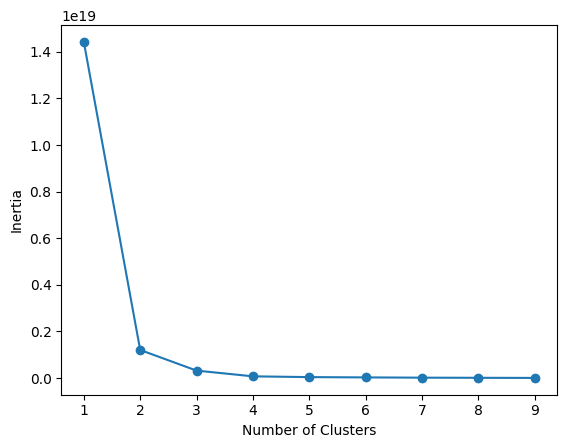

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
k_range = range(1,10)

inertia_arr = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state= 10)
    kmeans.fit(y) # 학습
    inertia_arr.append(kmeans.inertia_)

# Elbow function 그리기
plt.plot(k_range, inertia_arr, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### 위에서 군집을 2개로 하였으니 3개로 진행

In [67]:
km_cluster = KMeans(n_clusters=3, random_state= 0)
km_cluster.fit(y)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

products['cluster_label'] = cluster_label

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [68]:
products['cluster_label'].value_counts()

cluster_label
0    724796
1     23608
2      2911
Name: count, dtype: int64

In [69]:
print('cluster_label = 0:\n', products[products['cluster_label']==0]['judge'].value_counts())
print()
print('cluster_label = 1:\n', products[products['cluster_label']==1]['judge'].value_counts())
print()
print('cluster_label = 2:\n', products[products['cluster_label']==2]['judge'].value_counts())

cluster_label = 0:
 judge
1    520888
0    203908
Name: count, dtype: int64

cluster_label = 1:
 judge
1    15257
0     8351
Name: count, dtype: int64

cluster_label = 2:
 judge
1    2577
0     334
Name: count, dtype: int64


### 결과
- 예상외로 군집이 잘 되어보임

In [77]:
print(products[(products['cluster_label']==0) & (products['judge'] ==0) ]['KEYWORD'].value_counts())
products[(products['cluster_label']==0) & (products['judge'] ==0) ]['KEYWORD'].values[:30]

KEYWORD
The Ordinary                              3642
mobile phone                              3491
skin care                                 2394
Chemical                                  2203
Apple AirPods                             2147
                                          ... 
Hand Gloves,Gloves,Syringes                  1
Specialized S Works Venge                    1
Bose-Lifestyle 650                           1
HP Spectre X360                              1
aicar,Acadesine,AICA-Riboside,ostarine       1
Name: count, Length: 56348, dtype: int64


array(['1-BOC-4- 4-BROMO-PHENYLAM', 'N- tert-Butoxycarbonyl -4',
       '1-BOC-4- 4-FLUORO-PHENYLA', 'N-Isopropylbenzylamine',
       'Soybean soybean gmo',
       'neuramis,dermal filler,medytox,neuramis filler',
       'botulax,hugel,clostridium botulinum,toxin type A,botulax 100unit',
       'nabota,wrinkle improvement,medytox,nabota 100unit',
       'innotox,botulinum toxin,wrinkle improvement,clostridium type a,innotox 100unit',
       'coretox,meditoxin,innotox,botulax', 'BMK methyl glycidate',
       'Ethyl 2-phenylacetoacetat',
       'Most Popular Products F-lakka A-/PVP',
       'TopTiTech Customized,Nickel Fiber Felt,High Porosity Metal',
       'Crazy Product 119276-01-6 ', 'Bromazolam',
       'Latest Batch 2647-50-9\t  Flubromazepam', 'BMK',
       'modified starch,Cationic Starch,Oxidized Starch',
       'ESP32 Display Module', 'Odorless Paint Thinner',
       'Tianeptine Sodium Salt 30123-17-2', 'U-Channel Sign Post',
       'U Channel Sign Post', 'U-Channel Steel Sign 

In [76]:
print(products[(products['cluster_label']==1) & (products['judge'] ==0) ]['KEYWORD'].value_counts())
products[(products['cluster_label']==1) & (products['judge'] ==0) ]['KEYWORD'].values[:30]

KEYWORD
Huggies                                                                             659
Huggies Little Snugglers                                                            658
Baby Diapers                                                                        501
Pamperings Swaddlers Baby                                                           488
Pampering Swaddlers Baby                                                            391
                                                                                   ... 
Baby Diapers,Baby Diapers Scrap,Diapers in Bales,Diapers Bales,Used baby Diapers      1
400 watt led grow                                                                     1
50w grow light                                                                        1
led tube grow                                                                         1
LED street light                                                                      1
Name: count, Length: 101

array(['Pampering Baby Diapering', 'Huggies Little Snugglers',
       'Huggies Little Snugglers', 'Pampering Baby Swaddlers',
       'Pampering Baby Dry', 'Pampering Baby Diapering',
       'Pampering Baby Diapering-', 'Pampering Baby', 'Baby diapers',
       'Huggies Little Snuggler', 'Huggies Baby Little Mover',
       'Pamperings', 'Pamperings-Swaddlers-Baby', 'Huggies Snug & Dry',
       'Pampering Swaddlers Baby', 'Pampering Baby Diapering',
       'Pampering Baby', 'Huggies Little Movers',
       'Pampering Swaddlers Baby', 'Pamperings', 'Huggies', 'Huggies',
       'Huggies', 'Huggies', 'Pampering Baby', 'Pampering Baby Diapering',
       'pampering', 'pamperings', 'pamperings',
       'Huggies Little Snugglers'], dtype=object)

In [84]:
print(products[(products['cluster_label']==2) & (products['judge'] ==0) ]['KEYWORD'].value_counts())
products[(products['cluster_label']==2) & (products['judge'] ==0) ]['KEYWORD'].values[:30]

KEYWORD
Gold bars                                                                                                                                                   53
Gold                                                                                                                                                        25
Blue Diamond Seller,Brown Diamond Seller,Pink Diamond Seller,Red Diamond Seller,Purple Diamond Seller,Grey Diamond Seler,Colourless/White Diamond Seller    17
Aquamarine seller,Ruby Seller,Zircon,Emerald Seller,Kunzite Seller,Peridot,Tanzanite seller,Rubellite Seller,Sapphire Seller,Imperial Topaz Seller          11
Gold seller,Gold Bar seller,Gold Nugget Seller                                                                                                               9
                                                                                                                                                            ..
inline Skate Roller blades            

array(['CCM Ice Hockey Skates,Ice Hockey Skates,Hockey Skate,Roller Hockey Skate,Inline Hockey Skate',
       'Bauer Ice Hockey Skates,Ice Hockey Skates,Hockey Skates,Roller Hockey Skate,Inline Hockey Skate',
       'CCM Ice Hockey Skates,Bauer Ice Hockey Skates,Roller Hockey Skates,Ice Hockey Skates,Hockey Skates',
       'Seething-42-Inch-Longboar', 'Original-Appls-Watch-Seri',
       'Original-Appls-Watch-Seri', 'Original-Appls-Watch-Seri',
       'gold bars nuggets dust', 'Seething-42-Inch-Longboar',
       'Seething-42-Inch-Longboar', 'Seething-42-Inch-Longboar',
       'cooking oil', 'Wrist Watch Series',
       'Finest 22 karat,quality 24 karat,karat 24 karat,Buy fine quality,top quality 24 karat',
       'piercing earrings', 'Roller Skates', 'neckless',
       'purevision contact lens', 'freshlook contact lens',
       'Air Optix Contact Lens', 'Soflen 59 Eye Wear',
       'pureview contact lens', 'Precious Stone,Gold',
       'Precious Stone,Gold', 'Copper', 'Gold', 'Gold Bars